# Latihan
Gunakan data['Gender','Age','Annual Income','Spending Score'] dari data Mall_Customers.csv.

* Lakukan PCA dari data tersebut, ambil 2 komponen pertama untuk melihat pattern dari data kita.
    * jangan lupa encode data gender
    * putuskan apakah kalian perlu memakai scaling atau tidak
    * Berapa % informasi yang tersimpan di 2 komponen pertama?
* Lakukan clustering dengan Kmeans menggunakan 2 komponen yang kalian pilih
    * tentukan jumlah cluster yang optimum
    * analisis karakteristik masing-masing cluster yang terbentuk

## Library

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [122]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [123]:
df=df.rename(columns={
    'Annual Income (k$)':'Annual Income',
    'Spending Score (1-100)':'Spending Score'
})

In [124]:
df=df.drop(columns='CustomerID')
df.head()

,Gender,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Cek Data

In [125]:
df.isna().sum()

Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          200 non-null    object
 1   Age             200 non-null    int64 
 2   Annual Income   200 non-null    int64 
 3   Spending Score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [127]:
df.describe()

,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


## Preprocessing

In [128]:
transformer=ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'),['Gender'])
],remainder='passthrough')

In [129]:
df2=pd.DataFrame(transformer.fit_transform(df),columns=transformer.get_feature_names())
df2

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,onehot__x0_Male,Age,Annual Income,Spending Score
0,1.0,19.0,15.0,39.0
1,1.0,21.0,15.0,81.0
2,0.0,20.0,16.0,6.0
3,0.0,23.0,16.0,77.0
4,0.0,31.0,17.0,40.0
...,...,...,...,...
195,0.0,35.0,120.0,79.0
196,0.0,45.0,126.0,28.0
197,1.0,32.0,126.0,74.0
198,1.0,32.0,137.0,18.0


## PCA

In [130]:
from sklearn.decomposition import PCA

In [131]:
pca=PCA(n_components=4) #numbers of components to keep
pca.fit(df2)

#transform
x_pca=pca.transform(df2)

In [132]:
x_pca

array([[-3.18699448e+01, -3.30012521e+01, -2.21429871e+01,
         6.33880304e-01],
       [ 7.64494048e-01, -5.68429006e+01, -1.05426336e+01,
         6.65412754e-01],
       [-5.74082757e+01, -1.31249607e+01, -2.87509637e+01,
        -3.96334462e-01],
       [-2.16854252e+00, -5.34785900e+01, -9.51158805e+00,
        -3.42384685e-01],
       [-3.21740846e+01, -3.03884119e+01, -1.02250687e+01,
        -3.87777783e-01],
       [-2.17695183e+00, -5.22272685e+01, -1.07091371e+01,
        -3.42611586e-01],
       [-5.90656895e+01, -9.54376302e+00, -1.41418144e+01,
        -4.23905054e-01],
       [ 1.23708622e+01, -6.16180208e+01, -5.59301276e+00,
        -3.30427952e-01],
       [-6.63157690e+01, -3.21423160e+00,  1.33986279e+01,
         5.23415428e-01],
       [-5.65556212e+00, -4.72672225e+01, -3.83186657e+00,
        -3.61657319e-01],
       [-5.82365979e+01, -9.13418751e+00,  1.88466642e+01,
         5.27481945e-01],
       [ 1.46218043e+01, -6.21075685e+01,  7.24027620e+00,
      

In [133]:
variance=[]

for i in range(4):
    variance.append(np.var(x_pca[:,i])) 

In [134]:
variance

[696.7631101517201, 680.9101821328452, 166.39273663007572, 0.24427108535993702]

In [135]:
print('informasi yang tersimpan pada 2 komponen pertama', round(sum(variance[:2])/sum(variance)*100,2),'%')

informasi yang tersimpan pada 2 komponen pertama 89.21 %


In [136]:
x_pca=x_pca[:,:2]
x_pca

array([[-3.18699448e+01, -3.30012521e+01],
       [ 7.64494048e-01, -5.68429006e+01],
       [-5.74082757e+01, -1.31249607e+01],
       [-2.16854252e+00, -5.34785900e+01],
       [-3.21740846e+01, -3.03884119e+01],
       [-2.17695183e+00, -5.22272685e+01],
       [-5.90656895e+01, -9.54376302e+00],
       [ 1.23708622e+01, -6.16180208e+01],
       [-6.63157690e+01, -3.21423160e+00],
       [-5.65556212e+00, -4.72672225e+01],
       [-5.82365979e+01, -9.13418751e+00],
       [ 1.46218043e+01, -6.21075685e+01],
       [-5.51608374e+01, -1.00799251e+01],
       [-3.02878330e-03, -5.01140754e+01],
       [-5.27646657e+01, -1.16807468e+01],
       [ 1.94661180e+00, -5.15222086e+01],
       [-3.45055496e+01, -2.37615402e+01],
       [-7.30493262e+00, -4.35151138e+01],
       [-4.12573070e+01, -1.64734737e+01],
       [ 1.61902860e+01, -5.83001207e+01],
       [-3.27400141e+01, -2.13347966e+01],
       [-9.81885245e-01, -4.44524038e+01],
       [-5.78100898e+01, -1.87057486e+00],
       [-1.

In [137]:
pca_result=pd.DataFrame(x_pca,columns=['First Component','Second Component'])

In [138]:
pca_result.head()

,First Component,Second Component
0,-31.869945,-33.001252
1,0.764494,-56.842901
2,-57.408276,-13.124961
3,-2.168543,-53.478590
4,-32.174085,-30.388412


In [139]:
pca_result['First Component']

0     -31.869945
1       0.764494
2     -57.408276
3      -2.168543
4     -32.174085
         ...    
195    58.352515
196    19.908001
197    58.520804
198    20.979130
199    72.447693
Name: First Component, Length: 200, dtype: float64

<AxesSubplot:xlabel='First Component', ylabel='Second Component'>

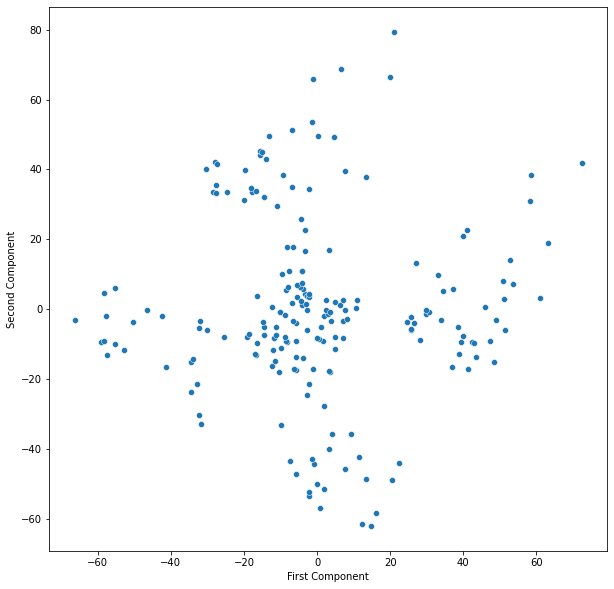

In [140]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='First Component', y='Second Component', data=pca_result)

## Clustering Kmeans

In [141]:
#fit Kmeans
kmeans=KMeans(n_clusters=5)
kmeans.fit(pca_result)

KMeans(n_clusters=5)

In [142]:
kmeans.labels_

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 3,
       4, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [143]:
kmeans.cluster_centers_

array([[  4.98536192, -46.67336912],
       [-10.22445521,  42.33140596],
       [ 41.55103875,   1.87087541],
       [ -4.41026389,  -3.10070422],
       [-44.38675468, -10.05043814]])

<AxesSubplot:xlabel='First Component', ylabel='Second Component'>

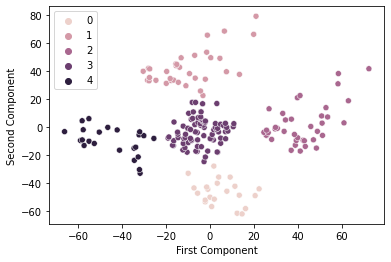

In [144]:
sns.scatterplot(x='First Component', y='Second Component', data=pca_result,hue=kmeans.labels_)

## Finding Best-K

In [160]:
from sklearn.metrics import silhouette_score

In [161]:
score=[]
k_num=range(2,8)
best=0

for i in k_num:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x_pca)
    labels=kmeans.labels_
    sil_score=(silhouette_score(x_pca,labels,metric='euclidean'))
    score.append(sil_score)
    
    if best<silhouette_score(x_pca,labels,metric='euclidean'):
        best=sil_score
        best_k=i

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Silhloutte')

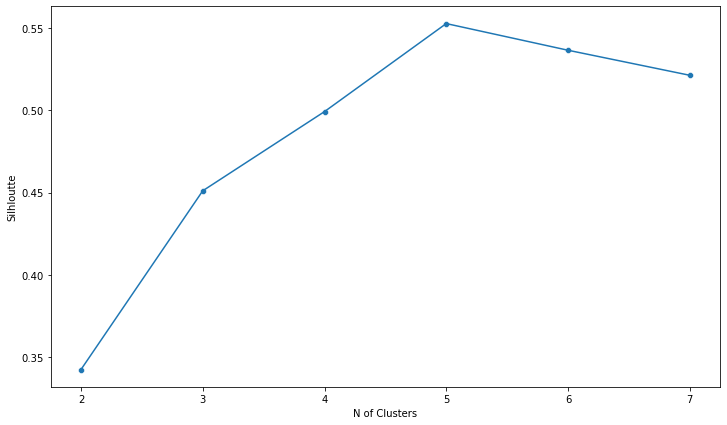

In [162]:
plt.figure(figsize=(12,7))
sns.lineplot(k_num,score)
sns.scatterplot(k_num,score)
plt.xticks(k_num)
plt.xlabel('N of Clusters')
plt.ylabel('Silhloutte')

In [163]:
print('Jumlah cluster optimum adalah',best_k,'dengan silhouette score',best)

Jumlah cluster optimum adalah 5 dengan silhouette score 0.5526264331833407


## Final Clustering

In [164]:
kmeans=KMeans(n_clusters=best_k, random_state=2020)
kmeans.fit(x_pca)

KMeans(n_clusters=5, random_state=2020)

## Description

In [182]:
df2['cluster']=kmeans.labels_

In [183]:
df2.head()

,onehot__x0_Male,Age,Annual Income,Spending Score,cluster
0,1.0,19.0,15.0,39.0,4
1,1.0,21.0,15.0,81.0,2
2,0.0,20.0,16.0,6.0,4
3,0.0,23.0,16.0,77.0,2
4,0.0,31.0,17.0,40.0,4


In [185]:
df2.groupby('cluster')['onehot__x0_Male','Age','Annual Income','Spending Score'].mean()

<ipython-input-185-5f4144b3a6d3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2.groupby('cluster')['onehot__x0_Male','Age','Annual Income','Spending Score'].mean()


,onehot__x0_Male,Age,Annual Income,Spending Score
cluster,,,,
0,0.402439,42.475610,55.475610,49.268293
1,0.461538,32.692308,86.538462,82.128205
2,0.409091,25.272727,25.727273,79.363636
3,0.558824,41.647059,88.735294,16.764706
4,0.391304,45.217391,26.304348,20.913043


* Cluster 0: middle income, middle spending, rata-rata umur 43
* Cluster 1: high income, high spending, rata-rata umur 33
* Cluster 2: low income, high spending, rata-rata umur 25
* Cluster 3: high income, low spending, rata-rata umur 42
* Cluster 4: low income, low spending, rata-rata umur 45